In [109]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)


In [110]:
# Helper function to calculate normalized resistance (R/R0)
def calculate_normalized_resistance(group):
    """Calculate R/R0 where R0 is the first resistance value in the cycle"""
    R0 = group['gas_resistance_ohm'].iloc[0]
    result = group.copy()
    result['R_R0'] = result['gas_resistance_ohm'] / R0
    return result


In [111]:
# Load and process data files
# ============================

# File paths
file_natural_air = 'e_sniffer_bme690_poc/logs/Natural Air/2025-10-18/bme690_Natural_Air___Inside_001909.csv'
file_coffee = 'e_sniffer_bme690_poc/logs/Coffee/2025-10-20/bme690_Coffee___Dunkin___Hazelnut___Yes___No_135201.csv'

# Load and process Natural Air file
print("Loading Natural Air data...")
df_natural_air_full = pd.read_csv(file_natural_air)

# Filter to first 50 cycles
all_cycles = sorted(df_natural_air_full['cycle_index'].unique())
first_50_cycles = all_cycles[:50]
df_natural_air = df_natural_air_full[df_natural_air_full['cycle_index'].isin(first_50_cycles)].copy()

# Calculate R/R0
df_natural_air = df_natural_air.groupby('cycle_index', group_keys=False).apply(
    calculate_normalized_resistance
).reset_index(drop=True)
cycles_natural_air = sorted(df_natural_air['cycle_index'].unique())
print(f"âœ“ Natural Air: {len(cycles_natural_air)} cycles (filtered from {len(all_cycles)} total), {len(df_natural_air)} data points")

# Load and process Coffee file
print("Loading Coffee data...")
df_coffee = pd.read_csv(file_coffee)
df_coffee = df_coffee.groupby('cycle_index', group_keys=False).apply(
    calculate_normalized_resistance
).reset_index(drop=True)
cycles_coffee = sorted(df_coffee['cycle_index'].unique())
print(f"âœ“ Coffee: {len(cycles_coffee)} cycles, {len(df_coffee)} data points")

print("\nData loaded successfully!")


Loading Natural Air data...
âœ“ Natural Air: 50 cycles (filtered from 100 total), 500 data points
Loading Coffee data...
âœ“ Coffee: 50 cycles, 500 data points

Data loaded successfully!


C:\Users\faizan.z\AppData\Local\Temp\ipykernel_20592\1334150106.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_natural_air = df_natural_air.groupby('cycle_index', group_keys=False).apply(
C:\Users\faizan.z\AppData\Local\Temp\ipykernel_20592\1334150106.py:27: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_coffee = df_coffee.groupby('cycle_index', group_keys=False).apply(


In [112]:
# Print statistics to verify error bar calculations
print("=== Natural Air Statistics ===")
stats_nat = df_natural_air.groupby('commanded_heater_temp_C')['R_R0'].agg(['mean', 'std', 'count']).reset_index()
print(stats_nat)
print("\n=== Coffee Statistics ===")
stats_cof = df_coffee.groupby('commanded_heater_temp_C')['R_R0'].agg(['mean', 'std', 'count']).reset_index()
print(stats_cof)


=== Natural Air Statistics ===
   commanded_heater_temp_C       mean       std  count
0                      100  13.609940  1.918719     50
1                      155   3.571624  0.922626    100
2                      210   1.689085  0.710641    100
3                      265   1.381187  0.695760    150
4                      320   1.013417  0.392078    100

=== Coffee Statistics ===
   commanded_heater_temp_C      mean       std  count
0                      100  2.473689  0.036584     50
1                      155  1.282136  0.136419    100
2                      210  1.000000  0.000000    100
3                      265  1.000000  0.000000    150
4                      320  1.017866  0.032759    100


In [113]:
# Diagnostic: Check variation in Coffee data
print("Coffee data diagnostics:")
print(f"Number of cycles: {len(df_coffee['cycle_index'].unique())}")
print(f"Number of unique temperatures: {len(df_coffee['commanded_heater_temp_C'].unique())}")
print("\nSample R/R0 values at temperature 320C:")
temp_320 = df_coffee[df_coffee['commanded_heater_temp_C'] == 320]['R_R0']
print(f"Count: {len(temp_320)}")
print(f"Mean: {temp_320.mean():.6f}")
print(f"Std: {temp_320.std():.6f}")
print(f"Min: {temp_320.min():.6f}")
print(f"Max: {temp_320.max():.6f}")
print(f"\nFirst 10 R/R0 values at 320C: {temp_320.head(10).values}")


Coffee data diagnostics:
Number of cycles: 50
Number of unique temperatures: 5

Sample R/R0 values at temperature 320C:
Count: 100
Mean: 1.017866
Std: 0.032759
Min: 1.000000
Max: 1.115315

First 10 R/R0 values at 320C: [1.         1.10676271 1.         1.09769827 1.         1.10480839
 1.         1.1146521  1.         1.10156469]


In [114]:
# Diagnostic: Print error bar statistics for the temperature plot
print("=== Error Bar Statistics for R/R0 vs Temperature Plot ===\n")
print("Natural Air grouped by temperature:")
nat_stats = df_natural_air.groupby('commanded_heater_temp_C')['R_R0'].agg(['mean', 'std', 'count']).reset_index()
print(nat_stats)
print("\nCoffee grouped by temperature:")
cof_stats = df_coffee.groupby('commanded_heater_temp_C')['R_R0'].agg(['mean', 'std', 'count']).reset_index()
print(cof_stats)
print("\n=== Key Observation ===")
print(f"Natural Air std range: {nat_stats['std'].min():.6f} to {nat_stats['std'].max():.6f}")
print(f"Coffee std range: {cof_stats['std'].min():.6f} to {cof_stats['std'].max():.6f}")


=== Error Bar Statistics for R/R0 vs Temperature Plot ===

Natural Air grouped by temperature:
   commanded_heater_temp_C       mean       std  count
0                      100  13.609940  1.918719     50
1                      155   3.571624  0.922626    100
2                      210   1.689085  0.710641    100
3                      265   1.381187  0.695760    150
4                      320   1.013417  0.392078    100

Coffee grouped by temperature:
   commanded_heater_temp_C      mean       std  count
0                      100  2.473689  0.036584     50
1                      155  1.282136  0.136419    100
2                      210  1.000000  0.000000    100
3                      265  1.000000  0.000000    150
4                      320  1.017866  0.032759    100

=== Key Observation ===
Natural Air std range: 0.392078 to 1.918719
Coffee std range: 0.000000 to 0.136419


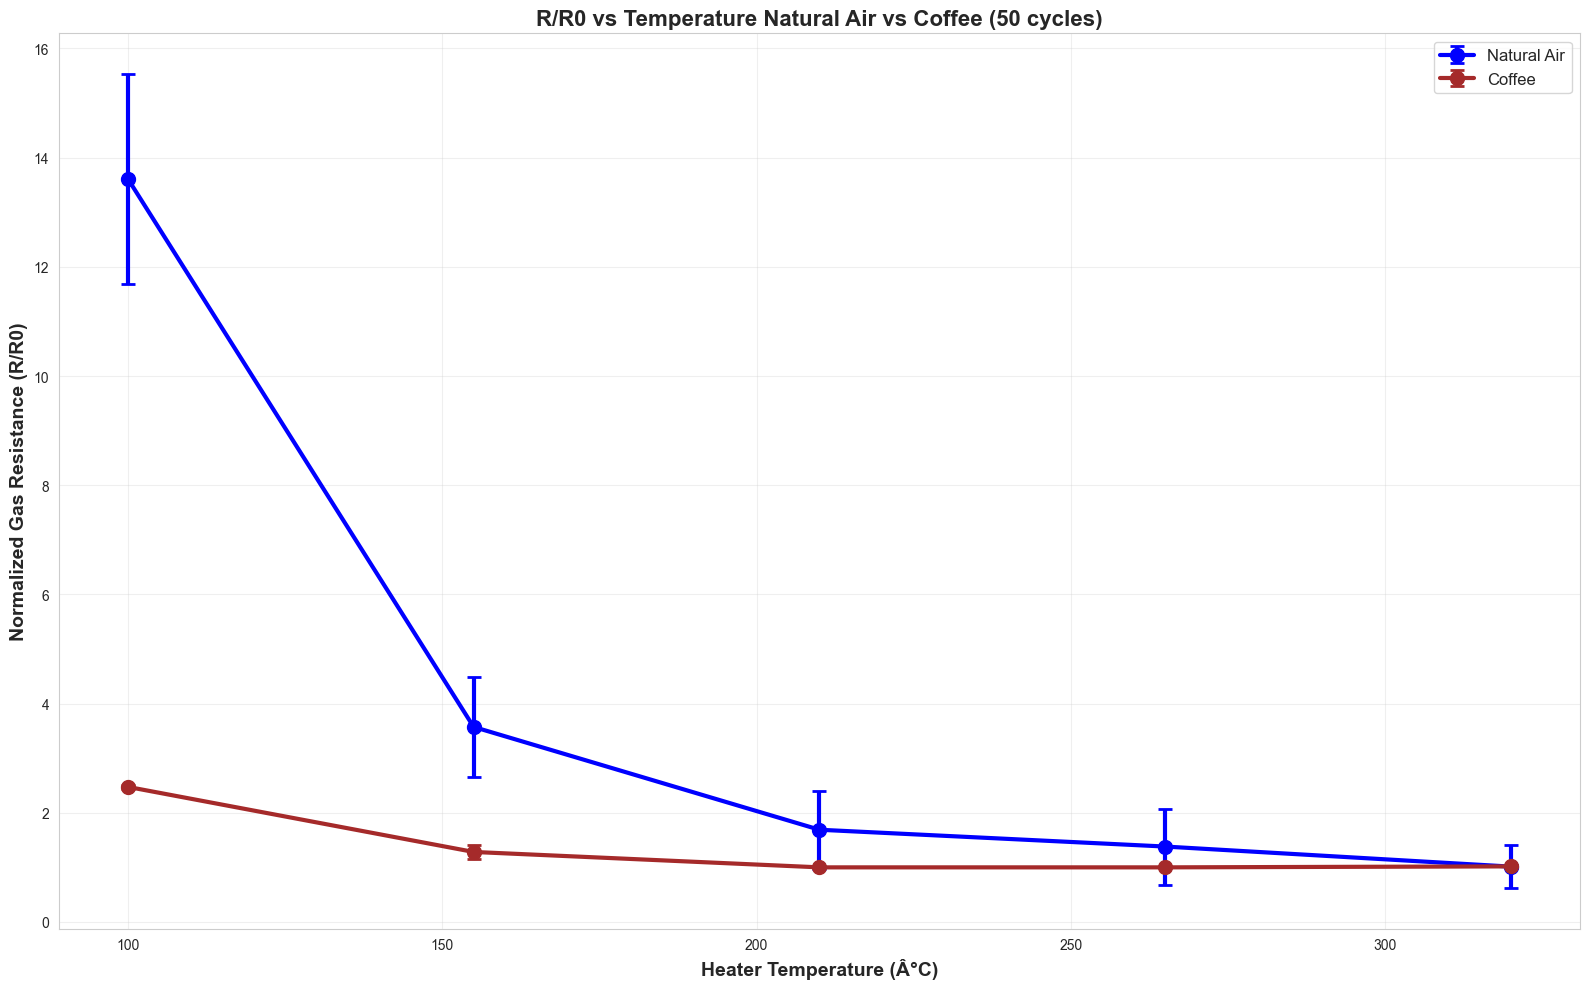

In [117]:
fig = plt.figure(figsize=(16, 10))

nat_stats = df_natural_air.groupby('commanded_heater_temp_C')['R_R0'].agg(['mean', 'std']).reset_index()

cof_stats = df_coffee.groupby('commanded_heater_temp_C')['R_R0'].agg(['mean', 'std']).reset_index()

plt.errorbar(nat_stats['commanded_heater_temp_C'], nat_stats['mean'], yerr=nat_stats['std'], marker='o', linewidth=3, markersize=10, color='blue', capsize=5, capthick=2, label='Natural Air')

plt.errorbar(cof_stats['commanded_heater_temp_C'], cof_stats['mean'], yerr=cof_stats['std'], marker='o', linewidth=3, markersize=10, color='brown', capsize=5, capthick=2, label='Coffee')

plt.xlabel('Heater Temperature (Â°C)', fontsize=14, fontweight='bold')
plt.ylabel('Normalized Gas Resistance (R/R0)', fontsize=14, fontweight='bold')
plt.title(f'R/R0 vs Temperature Natural Air vs Coffee ({len(cycles_natural_air)} cycles)', fontsize=16, fontweight='bold')
plt.legend(fontsize=12, loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [116]:
# Mean R/R0 by Step - Natural Air vs Coffee Comparison
# ======================================================

plt.figure(figsize=(16, 10))

# Calculate mean, std R/R0 and temperature by step for Natural Air
step_data_natural = df_natural_air.groupby('step_index').agg({
    'R_R0': ['mean', 'std'],
    'commanded_heater_temp_C': 'mean'
}).reset_index()
step_data_natural.columns = ['step_index', 'R_R0_mean', 'R_R0_std', 'commanded_heater_temp_C']

plt.errorbar(step_data_natural['step_index'],
         step_data_natural['R_R0_mean'],
         yerr=step_data_natural['R_R0_std'],
         marker='o',
         linewidth=3,
         markersize=10,
         color='blue',
         label='Natural Air',
         capsize=5,
         capthick=2)

# Calculate mean, std R/R0 and temperature by step for Coffee
step_data_coffee = df_coffee.groupby('step_index').agg({
    'R_R0': ['mean', 'std'],
    'commanded_heater_temp_C': 'mean'
}).reset_index()
step_data_coffee.columns = ['step_index', 'R_R0_mean', 'R_R0_std', 'commanded_heater_temp_C']

plt.errorbar(step_data_coffee['step_index'],
         step_data_coffee['R_R0_mean'],
         yerr=step_data_coffee['R_R0_std'],
         marker='s',
         linewidth=3,
         markersize=10,
         color='brown',
         label='Coffee',
         capsize=5,
         capthick=2)

# Set x-axis ticks to show temperature at each step
plt.xticks(step_data_natural['step_index'], 
           [f"{int(temp)}Â°C" for temp in step_data_natural['commanded_heater_temp_C']],
           rotation=45,
           ha='right')

plt.xlabel('Step Index (Temperature)', fontsize=14, fontweight='bold')
plt.ylabel('Mean Normalized Gas Resistance (R/R0)', fontsize=14, fontweight='bold')
plt.title(f'R/R0 by Step Natural Air vs Coffee ({len(cycles_natural_air)} cycles)',
          fontsize=16, fontweight='bold')
plt.legend(fontsize=12, loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print step information
print(f"Natural Air: {len(step_data_natural)} steps per cycle")
print(f"Coffee: {len(step_data_coffee)} steps per cycle")
print(f"
Natural Air R/R0 range: {step_data_natural['R_R0_mean'].min():.3f} - {step_data_natural['R_R0_mean'].max():.3f}")
print(f"Coffee R/R0 range: {step_data_coffee['R_R0_mean'].min():.3f} - {step_data_coffee['R_R0_mean'].max():.3f})

SyntaxError: unterminated f-string literal (detected at line 60) (2818897674.py, line 60)

Loading HP-502-20sDwell...
  âœ“ 20s Dwell: 50 cycles, 500 data points
Loading HP-502-10sDwell...
  âœ“ 10s Dwell: 50 cycles, 500 data points
Loading HP-502-5sDwell...
  âœ“ 5s Dwell: 50 cycles, 500 data points


C:\Users\faizan.z\AppData\Local\Temp\ipykernel_20592\3993611541.py:31: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_temp = df_temp.groupby('cycle_index', group_keys=False).apply(
C:\Users\faizan.z\AppData\Local\Temp\ipykernel_20592\3993611541.py:31: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_temp = df_temp.groupby('cycle_index', group_keys=False).apply(
C:\Users\faizan.z\AppData\Local\Temp\ipykernel_20592\3

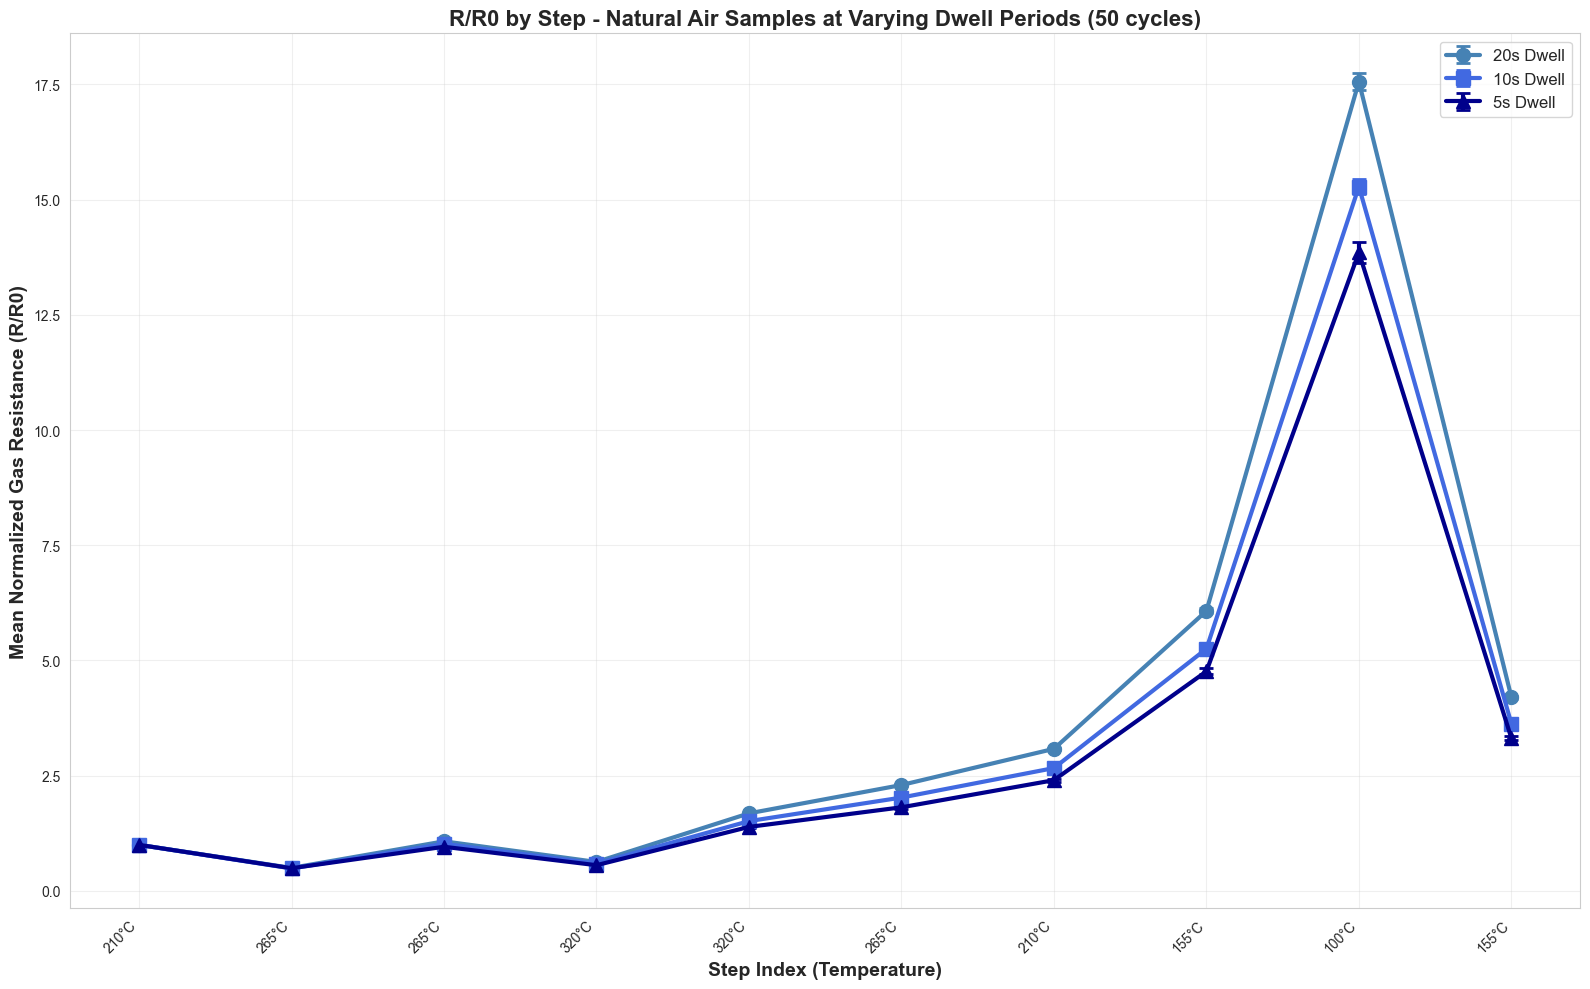

In [ ]:
# Mean R/R0 by Step - Three Natural Air Samples from 2025-10-20
# ================================================================

# Load and process all three Natural Air files from 2025-10-20
files_2025_10_20 = [
    'e_sniffer_bme690_poc/logs/Natural Air/2025-10-20/bme690_Natural_Air___Inside_104544.csv',
    'e_sniffer_bme690_poc/logs/Natural Air/2025-10-20/bme690_Natural_Air___Inside_113917.csv',
    'e_sniffer_bme690_poc/logs/Natural Air/2025-10-20/bme690_Natural_Air___Inside_122221.csv'
]

colors = ['steelblue', 'royalblue', 'darkblue']
markers = ['o', 's', '^']

plt.figure(figsize=(16, 10))

# Process and plot each file
for idx, (file_path, color, marker) in enumerate(zip(files_2025_10_20, colors, markers)):
    df_temp = pd.read_csv(file_path)
    
    # Extract profile name (dwell period) from the data
    profile_name = df_temp['profile_name'].iloc[0] if 'profile_name' in df_temp.columns else 'Unknown'
    
    # Extract dwell period from profile name (e.g., "HP-502-20sDwell" -> "20s Dwell")
    if 'sDwell' in profile_name:
        dwell_period = profile_name.split('-')[-1].replace('sDwell', 's Dwell')
    else:
        dwell_period = profile_name
    
    print(f"Loading {profile_name}...")
    
    df_temp = df_temp.groupby('cycle_index', group_keys=False).apply(
        calculate_normalized_resistance
    ).reset_index(drop=True)
    
    # Calculate mean R/R0 and temperature by step
    step_data = df_temp.groupby('step_index').agg({
        'R_R0': 'mean',
        'commanded_heater_temp_C': 'mean'
    }).reset_index()
    
    # Plot
    plt.plot(step_data['step_index'],
             step_data['R_R0'],
             marker=marker,
             linewidth=3,
             markersize=10,
             color=color,
             label=dwell_period)
    
    num_cycles = df_temp['cycle_index'].nunique()
    print(f"  âœ“ {dwell_period}: {num_cycles} cycles, {len(df_temp)} data points")

# Set x-axis ticks to show temperature at each step (use first file as reference)
if len(files_2025_10_20) > 0:
    plt.xticks(step_data['step_index'], 
               [f"{int(temp)}Â°C" for temp in step_data['commanded_heater_temp_C']],
               rotation=45,
               ha='right')

plt.xlabel('Step Index (Temperature)', fontsize=14, fontweight='bold')
plt.ylabel('Mean Normalized Gas Resistance (R/R0)', fontsize=14, fontweight='bold')
plt.title(f'R/R0 by Step - Natural Air Samples at Varying Dwell Periods ({len(cycles_natural_air)} cycles)',
          fontsize=16, fontweight='bold')
plt.legend(fontsize=12, loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


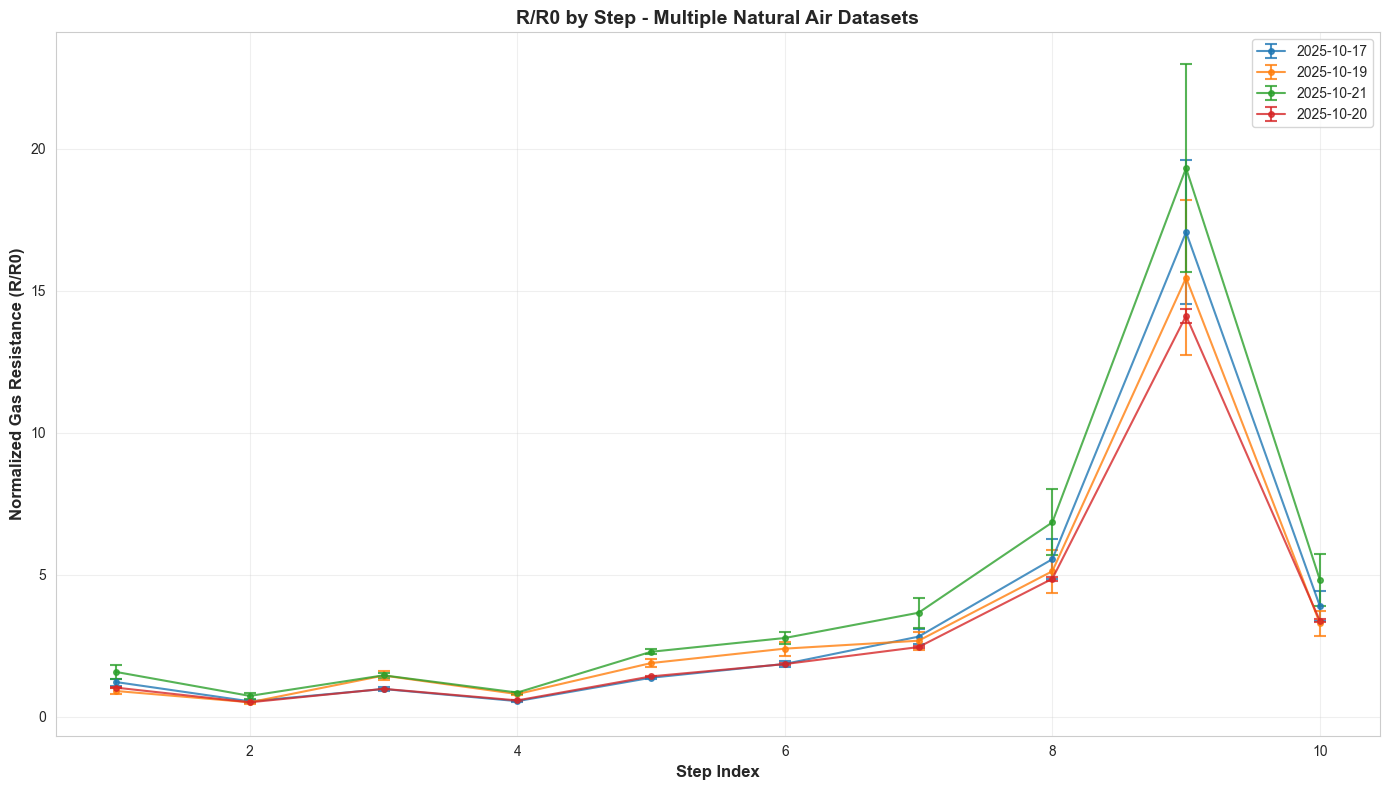

In [ ]:
# Plot mean r/R0 vs step for multiple datasets (separate lines)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the files
files = {
    '2025-10-17': 'e_sniffer_bme690_poc/logs/Natural Air/2025-10-17/bme690_Natural_Air___Inside_211756.csv',
    '2025-10-19': 'e_sniffer_bme690_poc/logs/2025-10-19/bme690_Natural_Air___Inside_134421.csv',
    '2025-10-21': 'e_sniffer_bme690_poc/logs/Natural_Air/Inside/2025-10-21/bme690_Natural_Air___Inside_012456.csv',
    '2025-10-20': 'e_sniffer_bme690_poc/logs/Natural Air/2025-10-20/bme690_Natural_Air___Inside_122221.csv'
}

# Create the plot
plt.figure(figsize=(14, 8))

for label, filepath in files.items():
    # Load the data
    df = pd.read_csv(filepath)
    
    # Calculate R0 (first gas resistance value)
    R0 = df['gas_resistance_ohm'].iloc[0]
    
    # Calculate r/R0
    df['r_R0'] = df['gas_resistance_ohm'] / R0
    
    # Group by step_index and calculate mean and std
    stats_by_step = df.groupby('step_index')['r_R0'].agg(['mean', 'std']).reset_index()
    
    # Plot mean r/R0 vs step_index for this dataset with error bars
    plt.errorbar(stats_by_step['step_index'], stats_by_step['mean'], yerr=stats_by_step['std'], 
                 label=label, marker='o', markersize=4, linewidth=1.5, alpha=0.8, capsize=4, capthick=1.5)

plt.xlabel('Step Index', fontsize=12, fontweight='bold')
plt.ylabel('Normalized Gas Resistance (R/R0)', fontsize=12, fontweight='bold')
plt.title('R/R0 by Step - Multiple Natural Air Datasets', fontsize=14, fontweight='bold')
plt.legend(loc='best', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
